# Line plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/쿠팡 프로젝트/sydney.csv', encoding='cp949', engine='python')

In [ ]:
# 시계열 데이터를 다룰 때 -> datetime64 형태로 놓고 하는 것이 좋음
# 시간과 날짜를 데이터프레임의 index로 설정하는 것이 좋음 -> .set_index('column')으로 가능함

# - 각 플롯에 축 레이블과 범례를 설정하는 것이 중요함
#   -> .plot()을 하고서 ax에 할당함
#   -> 축 레이블, 제목 등을 설정할 수 있음
#   -> + 여러 매개변수 조정 가능

In [7]:
df=df.set_index('Date') # 날짜를 데이터프레임의 인덱스로 설정

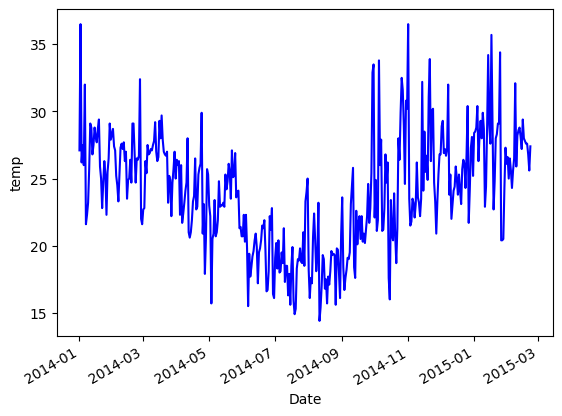

In [12]:
df2=df['Maximum temperature (°C)']
ax = df2.plot(color='blue')
ax.set_xlabel('Date') # x축을 날짜로 설정
ax.set_ylabel('temp')
plt.show()

# 월의 경과에 따른 최고 기온의 변화

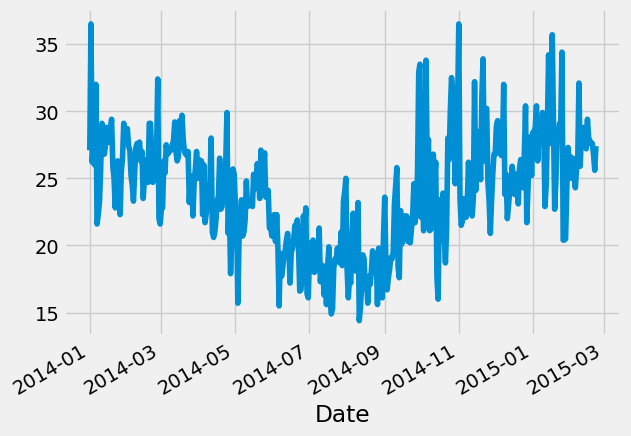

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ax1=df2.plot()
plt.show()

# 그래프 커스텀 설정

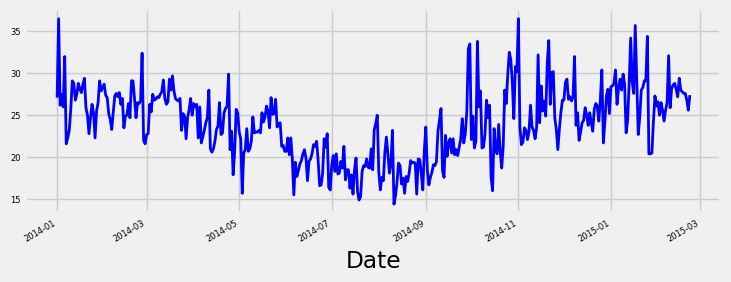

In [14]:
ax = df2.plot(color='blue', figsize=(8,3), linewidth=2, fontsize=6)

In [ ]:
# 특정 구간의 데이터만 추출하기
# - datetime 형태에서 그냥 slicing 적용하면 원하는 기간만큼 추출이 됨

# axvline, axhline - 전체 그래프를 가로지르는 선 표시 가능

# 관심 부분을 강조하여 표시하기
# - 특정 영역에 음영 처리되는 섹션 추가 : axhspan 사용

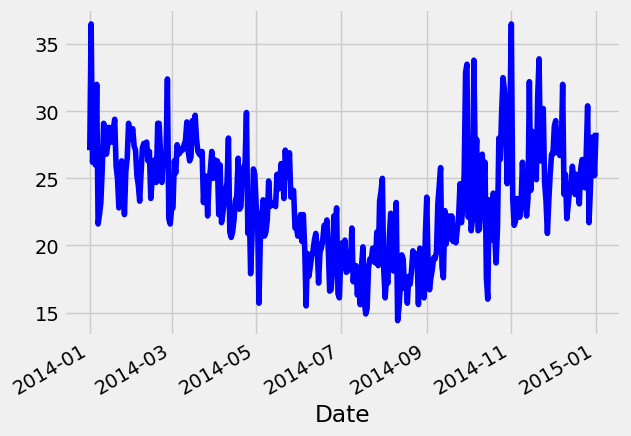

In [15]:
subset = df2['2014-01-01':'2015-01-01'] # 2014년도의 데이터만 가지고 그래프 그리기
ax = subset.plot(color='blue')
plt.show()

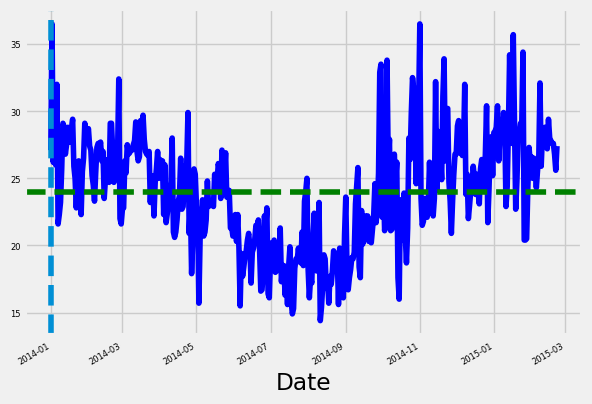

In [20]:
# 수평 및 수직선 추가
ax=df2.plot(color='blue', fontsize=6)
ax.axvline('2014-01-01', linestyle='--')
ax.axhline(24, color='green', linestyle='--')
plt.show()

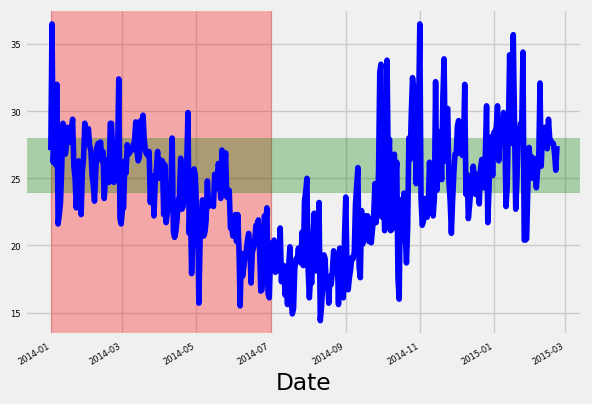

In [21]:
# 특정 영역에 음영 추가하기

ax=df2.plot(color='blue', fontsize=6)
ax.axvspan('2014-01-01', '2014-07-01', color='red', alpha=0.3) # 날짜 기준으로 음영 처리. alpha는 투명도 나타내는 매개변수
ax.axhspan(24,28, color='green', alpha=0.3) # 수평 라인 그리기
plt.show()

# Summary Stats and Diagnostics

In [ ]:
# 시계열 데이터의 전처리
# 1. 결측치 확인
#   -> .isnull()을 이용하여 확인 가능
#   -> .isnull().sum()을 통하여 결측행의 개수를 알 수 있음
# 2. 결측치 대체
#   -> fillna를 이용해 가능
#   -> method='bfill'을 입력하면 결측이 다음 값으로 대치되도록 함(ffill은 그 반대로 작동)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/쿠팡 프로젝트/sydney.csv', encoding='cp949', engine='python')

In [ ]:
df

,Date,Day,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),city
0,1/02/2015,Su,19.3,26.6,0.0,9.4,7.0,SE,37.0,13:06,...,SSW,9.0,1009.5,24.2,55.0,6.0,ESE,19.0,1009.3,Sydney
1,2/02/2015,Mo,18.0,25.0,3.4,6.6,8.7,SSE,61.0,15:13,...,SSW,19.0,1015.5,23.4,59.0,2.0,S,35.0,1015.9,Sydney
2,3/02/2015,Tu,18.5,26.5,1.0,8.6,9.8,SSE,43.0,13:13,...,SW,17.0,1020.1,25.7,45.0,2.0,SE,24.0,1017.5,Sydney
3,4/02/2015,We,17.3,25.6,1.2,6.4,6.6,SSE,43.0,14:00,...,W,15.0,1015.7,22.9,58.0,6.0,SSE,30.0,1015.7,Sydney
4,5/02/2015,Th,18.6,24.3,7.4,7.2,0.5,ESE,46.0,1:03,...,ESE,20.0,1023.2,22.5,54.0,7.0,ESE,13.0,1024.1,Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,27/1/2014,Mo,16.0,25.5,0.2,3.6,12.7,NE,44.0,16:13,...,W,13.0,1024.4,24.7,52.0,3.0,ENE,26.0,1022.3,Sydney
415,28/1/2014,Tu,19.6,26.5,0.0,9.4,13.0,NE,57.0,16:54,...,NNE,17.0,1021.5,25.5,56.0,1.0,NE,28.0,1018.4,Sydney
416,29/1/2014,We,20.3,29.1,0.0,12.0,13.0,NE,44.0,17:15,...,NNE,6.0,1017.0,29.0,45.0,1.0,NE,20.0,1014.0,Sydney
417,30/1/2014,Th,21.7,27.9,0.0,9.6,13.0,NE,52.0,11:39,...,E,13.0,1019.9,27.6,44.0,0.0,NE,30.0,1016.8,Sydney


In [ ]:
df.isnull().sum()

Date                                 0
Day                                  0
Minimum temperature (°C)             1
Maximum temperature (°C)             1
Rainfall (mm)                        4
Evaporation (mm)                     4
Sunshine (hours)                     2
Direction of maximum wind gust       7
Speed of maximum wind gust (km/h)    7
Time of maximum wind gust            7
9am Temperature (°C)                 1
9am relative humidity (%)            1
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                1
9am MSL pressure (hPa)               1
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm cloud amount (oktas)             1
3pm wind direction                   1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
city                                 0
dtype: int64

In [ ]:
df = df.fillna(method='bfill') # 직후의 값을 결측치 대신에 채움
df.isnull().sum() # 결측치의 개수 다시 확인

Date                                 0
Day                                  0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
city                                 0
dtype: int64

In [ ]:
# 이동평균
# - 단기 변동 완화 -> 평활화
# - 이상값 제거
# - 장기적 추세 또는 주기를 강조

# .rolling(window=)
# -> 날짜 축을 따라 이동하면서 window 개수만큼의 평균을 구함 -> 때로 계절성에 따라 정해짐 -> 7로 정하면 주간 평균을 구할 수 있음

In [ ]:
# 어떤 조건하에서의 합계를 구하고자 할 때
# - .index 명령어를 이용해 가능함 -> 연도를 추출하고자 한다면, df.index.year로 할 수 있음(단, 데이터 형태가 datetime이어야 함)
# - 이를 통해, 다음과 같은 질문에 대한 답을 할 수 있음
#   -> 특정 요일의 시계열의 평균값은? or 연중 각 월의 시계열의 평균값은?

In [ ]:
df.columns

Index(['Date', 'Day', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'city'],
      dtype='object')

In [3]:
from datetime import datetime
date_format = "%d/%m/%Y"
# 문자열을 datetime으로 변환
for i in range(len(df['Date'])):
  if df['Date'][i] == '2015-02-23':
    df['Date'][i] = '23/02/2015'

<ipython-input-3-2bd15c4b1bf7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i] = '23/02/2015'


In [4]:
def convert_to_datetime(date_str):
    return datetime.strptime(date_str, date_format)

date_series = df['Date']
# apply 함수를 사용하여 각 원소에 함수 적용
date_series_datetime = date_series.apply(convert_to_datetime)

print(date_series_datetime)

0     2015-02-01
1     2015-02-02
2     2015-02-03
3     2015-02-04
4     2015-02-05
         ...    
414   2014-01-27
415   2014-01-28
416   2014-01-29
417   2014-01-30
418   2014-01-31
Name: Date, Length: 419, dtype: datetime64[ns]


In [5]:
df['Date'] = date_series_datetime

In [6]:
df

,Date,Day,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),city
0,2015-02-01,Su,19.3,26.6,0.0,9.4,7.0,SE,37.0,13:06,...,SSW,9.0,1009.5,24.2,55.0,6.0,ESE,19.0,1009.3,Sydney
1,2015-02-02,Mo,18.0,25.0,3.4,6.6,8.7,SSE,61.0,15:13,...,SSW,19.0,1015.5,23.4,59.0,2.0,S,35.0,1015.9,Sydney
2,2015-02-03,Tu,18.5,26.5,1.0,8.6,9.8,SSE,43.0,13:13,...,SW,17.0,1020.1,25.7,45.0,2.0,SE,24.0,1017.5,Sydney
3,2015-02-04,We,17.3,25.6,1.2,6.4,6.6,SSE,43.0,14:00,...,W,15.0,1015.7,22.9,58.0,6.0,SSE,30.0,1015.7,Sydney
4,2015-02-05,Th,18.6,24.3,7.4,7.2,0.5,ESE,46.0,1:03,...,ESE,20.0,1023.2,22.5,54.0,7.0,ESE,13.0,1024.1,Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2014-01-27,Mo,16.0,25.5,0.2,3.6,12.7,NE,44.0,16:13,...,W,13.0,1024.4,24.7,52.0,3.0,ENE,26.0,1022.3,Sydney
415,2014-01-28,Tu,19.6,26.5,0.0,9.4,13.0,NE,57.0,16:54,...,NNE,17.0,1021.5,25.5,56.0,1.0,NE,28.0,1018.4,Sydney
416,2014-01-29,We,20.3,29.1,0.0,12.0,13.0,NE,44.0,17:15,...,NNE,6.0,1017.0,29.0,45.0,1.0,NE,20.0,1014.0,Sydney
417,2014-01-30,Th,21.7,27.9,0.0,9.6,13.0,NE,52.0,11:39,...,E,13.0,1019.9,27.6,44.0,0.0,NE,30.0,1016.8,Sydney


In [ ]:
ma = df['Rainfall (mm)'].rolling(window=7).mean()

In [ ]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = df['Rainfall (mm)'].rolling(window=7).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = df['Rainfall (mm)'].rolling(window=7).std()

In [ ]:
print(ma)
print(mstd)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
414    1.571429
415    0.857143
416    0.428571
417    0.400000
418    0.400000
Name: Rainfall (mm), Length: 419, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
414    1.940545
415    1.273914
416    0.875051
417    0.886942
418    0.886942
Name: Rainfall (mm), Length: 419, dtype: float64


In [ ]:
# 데이터에서 월만 추출하기
months = df['Date'].dt.month

In [ ]:
# 월별 평균 구하기
df['month'] = months
mean_month = df.groupby('month').mean()

<ipython-input-42-855546d33459>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_month = df.groupby('month').mean()


In [ ]:
mean_month

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
month,,,,,,,,,,,,,,,,
1,20.114516,27.196774,2.954839,7.725806,8.214516,43.548387,23.475806,66.403226,4.193548,12.435484,1014.311290,25.701613,57.661290,3.935484,22.290323,1012.300000
2,20.127451,26.711765,1.682353,6.780392,6.952941,39.823529,22.731373,71.764706,5.235294,12.235294,1017.507843,25.037255,59.901961,4.549020,21.843137,1015.921569
3,19.151613,26.367742,3.309677,5.141935,6.393548,39.354839,21.793548,72.032258,4.419355,10.483871,1020.012903,24.841935,61.096774,5.161290,18.064516,1017.964516
4,15.860000,23.843333,4.033333,3.680000,5.436667,35.666667,18.580000,72.233333,5.400000,15.400000,1018.496667,22.496667,58.566667,5.100000,15.633333,1015.993333
5,13.080645,23.158065,0.883871,3.664516,7.525806,33.935484,15.509677,70.354839,3.451613,16.387097,1021.664516,21.732258,46.838710,3.709677,15.903226,1019.035484
6,11.030000,19.593333,2.266667,3.313333,6.373333,42.166667,13.163333,70.766667,4.033333,18.433333,1020.013333,18.483333,50.333333,4.100000,16.966667,1017.546667
7,8.903226,18.951613,0.529032,3.141935,7.448387,42.064516,11.309677,64.612903,3.258065,17.870968,1020.177419,17.854839,43.290323,2.967742,19.129032,1017.077419
8,9.622581,18.341935,6.941935,3.522581,6.374194,40.935484,12.025806,75.096774,4.645161,18.354839,1026.006452,16.903226,58.225806,3.677419,19.000000,1023.767742
9,12.333333,21.880000,1.680000,4.706667,8.200000,43.866667,16.676667,61.333333,3.800000,15.100000,1020.280000,19.876667,49.633333,3.366667,20.700000,1017.213333


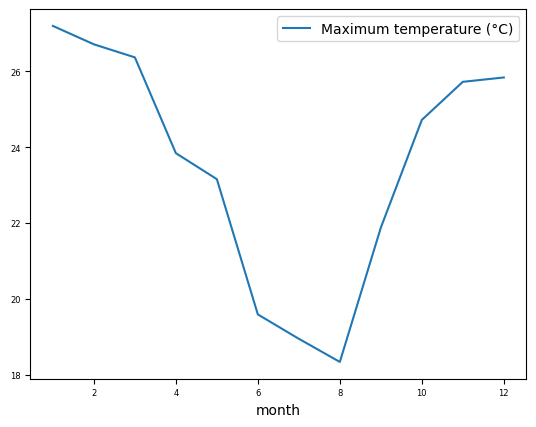

In [ ]:
# 월별 최고 기온의 그래프

mean_month['Maximum temperature (°C)'].plot(fontsize=6)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 요약통계량 정보 제공
#   - .describe()를 통해 가능 -> 수치형 컬럼에 대해서만 수행함
#   - .boxplot()를 통해 데이터의 모양, 변동성에 대한 정보 제공(상자 그림)

# <히스토그램>
#   - .plot(kind='hist')로 생성 가능
#   - density plot을 통해 가능 -> 커널 평활화를 사용함. 노이즈와 이상값의 영향을 완화함

In [ ]:
# 기본 기술통계량 확인
df.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),month
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,15.801909,23.957995,2.608592,5.480668,7.311217,41.725537,18.843675,67.663484,4.353222,14.558473,1018.410740,22.364200,54.828162,4.119332,20.138425,1016.075656,5.868735
std,4.483238,4.193958,6.930877,2.694720,3.829593,12.506404,4.853049,13.878622,2.695789,6.818445,6.986741,4.059776,14.959885,2.623064,6.911258,7.057127,3.652285
min,5.500000,14.400000,0.000000,0.200000,0.000000,17.000000,8.200000,19.000000,0.000000,2.000000,996.500000,12.300000,16.000000,0.000000,2.000000,994.800000,1.000000
25%,12.000000,20.850000,0.000000,3.400000,4.100000,33.000000,14.850000,59.000000,1.000000,9.000000,1013.900000,19.500000,45.500000,1.500000,15.000000,1011.450000,2.000000
50%,16.600000,24.200000,0.000000,5.200000,8.300000,41.000000,19.700000,67.000000,5.000000,15.000000,1018.600000,22.600000,56.000000,4.000000,20.000000,1016.200000,6.000000
75%,19.600000,26.900000,1.500000,7.400000,10.300000,48.000000,22.700000,78.500000,7.000000,19.000000,1023.300000,25.350000,64.000000,7.000000,24.000000,1021.250000,9.000000
max,22.800000,36.500000,70.800000,15.000000,13.400000,96.000000,31.000000,96.000000,8.000000,35.000000,1035.000000,34.500000,93.000000,8.000000,44.000000,1032.500000,12.000000


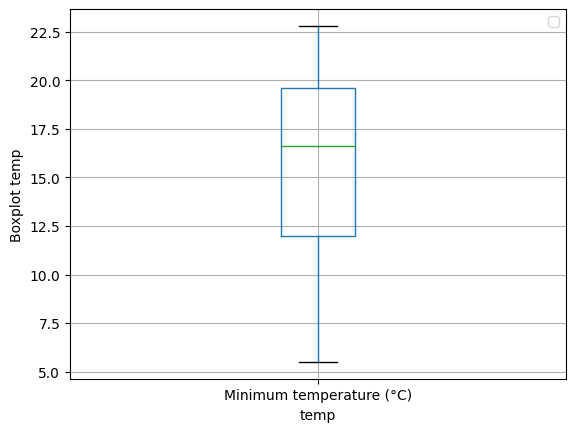

In [ ]:
# 상자그림을 통하여 분포 확인 - 최저 기온에 대해서 수행
ax = df['Minimum temperature (°C)'].to_frame().boxplot() # series 형태이므로 데이터프레임으로 변환
ax.set_xlabel('temp', fontsize=10)
ax.set_ylabel('Boxplot temp', fontsize=10)
plt.legend(fontsize=10)
plt.show()

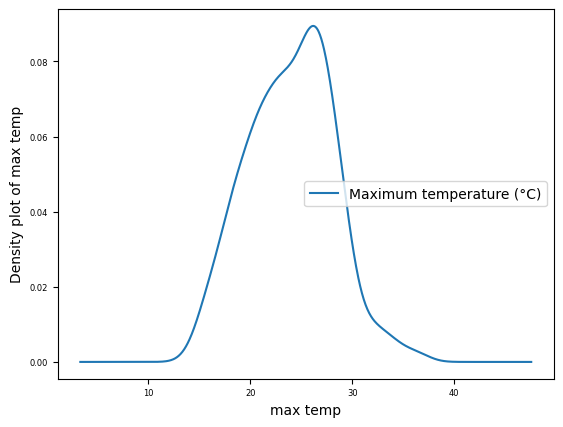

In [ ]:
# 밀도 함수 그리기 - 최고 기온에 대하여
ax = df['Maximum temperature (°C)'].to_frame().plot(kind='density', fontsize=6)
ax.set_xlabel('max temp', fontsize=10)
ax.set_ylabel('Density plot of max temp', fontsize=10)

plt.show()

# Seasonality, Trend and Noise

In [ ]:
# 자기상관/부분자기상관
# - .plot_acf를 이용하여 자기상관을 측정하고 그래프를 그릴 수 있음(옵션으로 시차 lag를 지정함)
# - 이전 시점의 효과는 제거하고 시차의 길이만큼의 상관관계를 구하는 것 : 부분자기상관: .plot_pacf 사용

In [23]:
from statsmodels.graphics import tsaplots

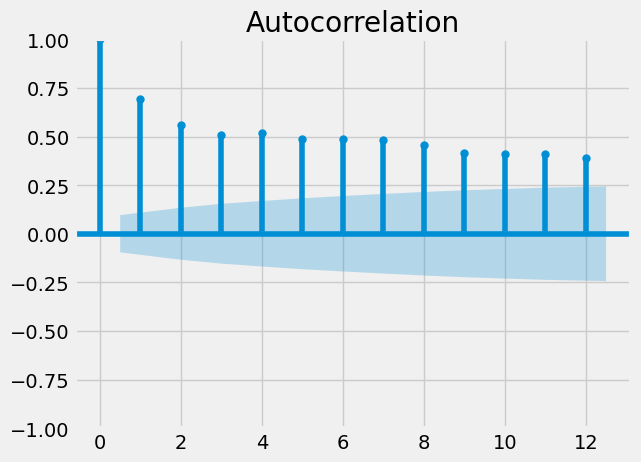

In [37]:
# ACF 그래프 그리기
df2 = df2.fillna(method='bfill')
fig = tsaplots.plot_acf(df2, lags=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


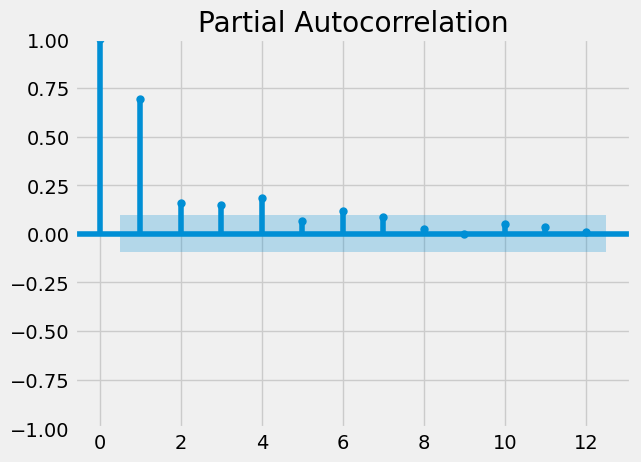

In [38]:
# PACF 그래프 그리기
fig2 = tsaplots.plot_pacf(df2, lags=12)
plt.show()

In [ ]:
# 시계열 데이터의 주요 특성
# 1. 계절성
# 2. 추세
# 3. 노이즈

# -> 시계열 분해 수행

In [43]:
import statsmodels.api as sm

# 분해법 수행
decomposition = sm.tsa.seasonal_decompose(df2)
print(decomposition.seasonal)

ValueError: ignored

In [ ]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [ ]:
# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

In [ ]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

# Multiple time series

In [1]:
# 여러 시계열 데이터 처리
# - 누적 합계를 이용한 영역 차트 그리기: 주로 다중 시계열 데이터가 있을 때 많이 사용함

In [ ]:
# 데이터 읽어오기
meat = pd.read_csv(url_meat)

# 날짜 컬럼을 datetime 형태로 바꾸어주기
meat['date'] = pd.to_datetime(meat['date'])

# 날짜 컬럼을 인덱스로 설정하기
meat = meat.set_index('date')

# 데이터프레임의 요약통계량 제공
print(meat.describe())

In [5]:
# 다중 시계열 데이터 시각화하기
# - 그래프에다가 기술통계량을 추가하여 한번에 표시할 수 있음
# - 서로 특성이 다른(진폭의 범위 등) 시계열 데이터들을 하나의 그래프에 표현하면 y축의 범위가 자동 설정됨에 따라 불편함 발생
#   -> subplot을 설정하여 구분 가능
#   -> colormap을 통하여 색을 구분하여 각각의 플롯 구분 가능

In [ ]:
# 요약통계량을 그래프에 추가하여 나타내기

# 날짜를 기준으로 x축 설정하기
ax.set_xlabel('Date', fontsize=6)

# 요약값들을 나타내는 테이블 생성
ax.table(cellText=meat_mean.values, # 평균에 대한 정보를 표시
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# 범례를 나타내는 표시 추가
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

plt.show()

In [ ]:
# 각각의 품목에 대해 개별적인 그래프 그리기 - facet 사용

meat.plot(subplots=True,
          layout=(2, 4),
          sharex=False,
          sharey=False,
          colormap='viridis',
          fontsize=2,
          legend=False,
          linewidth=0.2)

plt.show()

In [6]:
# 시계열끼리의 관계 찾기
# - 상관계수 확인: 선형관계는 피어슨, 비선형이면 스피어만 등
# - correlation matrix 그리기

# -> 모든 시간 간의 상관관계를 확인하고 싶다면?
# - 열에 대한 참조를 제거
# - 히트맵으로 표현 : 주로 sns.clustermap() 함수를 이용->계층적 군집화를 사용하는 표현 방식

In [ ]:
# seaborn 사용하기

import seaborn as sns

# 데이터프레임에 대한 상관계수 행렬 계산
corr_meat = meat.corr(method='spearman')

# 해당 상관계수 행렬에 대한 히트맵 구성
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
import seaborn as sns

corr_meat = meat.corr(method='pearson')

# 클러스터맵 사용 -> 상관계수 행렬의 구조를 확인할 수 있게 해줌(순서 관계) by 계층적 군집화 아이디어
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

# Case Study